# project overview 

mainly, This project will give the analyst insight on how to track the Data analysis process. From data wrangling until data visulization. Will look into the data to see : Highest months of riders , the busiest stations , and riders types and genders. 

# dataset overveiw 


The data has been downloade from https://s3.amazonaws.com/baywheels-data/index.html. It has 519700 trip with different features to give us better insight in how to read data. 

In [1]:
# import all required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time

%matplotlib inline

In [2]:
df_top8 = pd.read_csv("2017-fordgobike-tripdata-clean.csv")

In [3]:
df_top8.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,start_month_num,start_month_char,start_hour,period_day,start_weekday_num,start_weekday_char,age
0,9226,2017-12-31 22:51:00.918,2018-01-01 01:24:47.166,1487,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,Customer,NaN,NaN,12,Dec,22,night,6,Sun,NaN
1,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,2311,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,2311,Spear St at Folsom St,37.789677,...,Subscriber,1990.0,Male,12,Dec,23,night,6,Sun,27.0
2,2170,2017-12-31 23:52:55.937,2018-01-01 00:29:06.924,3717,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3717,Spear St at Folsom St,37.789677,...,Subscriber,1990.0,Male,12,Dec,23,night,6,Sun,27.0


In [4]:
# convert time period, month, and weekday into ordered categorical types
ordinal_var_dict = {'start_month_char': ['Jul','Aug','Sep','Oct','Nov','Dec'],
                    'period_day': ['morning', 'afternoon', 'night'],
                    'start_weekday_char': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_top8[var] = df_top8[var].astype(ordered_var)

In [5]:
df_customer = df_top8.query('user_type == "Customer"')
df_subscriber = df_top8.query('user_type == "Subscriber"')

Lets get the busiest stations in the datset 

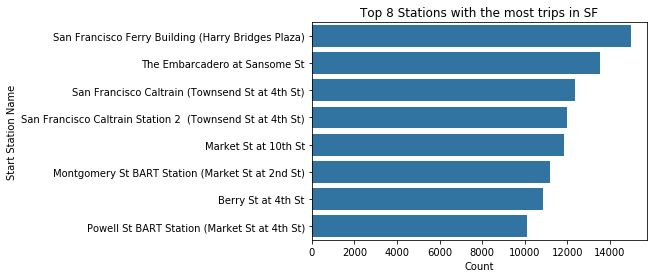

In [7]:
# lest plot the top 8 locations with traffic. 
st_stat_counts = df_top8['start_station_name'].value_counts()
st_stat_order = st_stat_counts.index




base_color = sb.color_palette()[0]
sb.countplot(data=df_top8, y='start_station_name', color=base_color, order=st_stat_order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 8 Stations with the most trips in SF');

all this stations connected to transporartion and buisness area, but lets explore more by timing. 

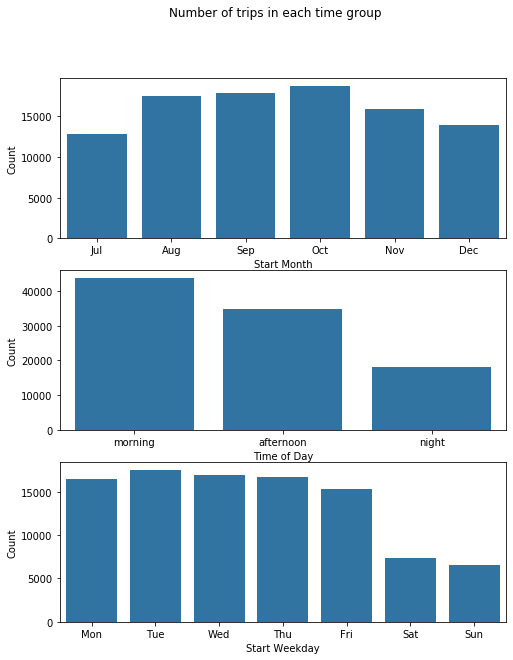

In [8]:
# Time
mon_cl = ['Jul','Aug','Sep','Oct','Nov','Dec']
mon_cl2 = pd.api.types.CategoricalDtype(ordered=True, categories=mon_cl)
df_top8['start_month_char'] = df_top8['start_month_char'].astype(mon_cl2)


fig, ax = plt.subplots(nrows=3, figsize = [8,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_top8, x = 'start_month_char', color = default_color, ax = ax[0])
sb.countplot(data = df_top8, x = 'period_day', color = default_color, ax = ax[1])
sb.countplot(data = df_top8, x = 'start_weekday_char', color = default_color, ax = ax[2])
ax[0].set_xlabel('Start Month')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Time of Day')
ax[1].set_ylabel('Count')
ax[2].set_xlabel('Start Weekday')
ax[2].set_ylabel('Count')
fig.suptitle('Number of trips in each time group');

excatly as i guessed , its more during weekdays and working hours than night. Putting in considerations the season cold wheather will decrease the number of trips. 

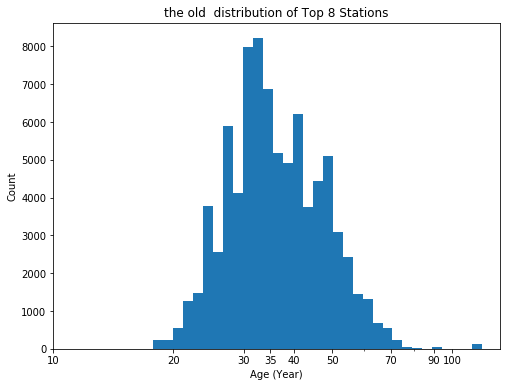

In [9]:
# lets explore by ages. 
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(df_top8['age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = df_top8, x = 'age', bins = bins)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100])
plt.xlabel('Age (Year)')
plt.ylabel('Count')
plt.title('the old  distribution of Top 8 Stations');

its very clear that young people the ages between 30 - 35 have highest range of riding. 

## Conculsion 


from the above analysis, we can see that males and young people are more into riding during week days , due to work reason and diffenetly the cost of transportation and traffic reason. 